In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
df = pd.read_csv('letter-recognition.data',sep=',')
df.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [3]:
df.shape

(19999, 17)

In [4]:
temp = df.columns
df.loc[len(df.index)] = temp

In [5]:
df.shape

(20000, 17)

### 1. Title: Letter Image Recognition Data ###

### 2. Source Information ###
      Creator: David J. Slate 
      Odesta Corporation; 1890 Maple Ave; Suite 115; Evanston, IL 60201
      Donor: David J. Slate (dave@math.nwu.edu) (708) 491-3867   
      Date: January, 1991

### 3. Past Usage: ###
    P. W. Frey and D. J. Slate (Machine Learning Vol 6 #2 March 91):
	"Letter Recognition Using Holland-style Adaptive Classifiers".

   	The research for this article investigated the ability of several
	variations of Holland-style adaptive classifier systems to learn to
	correctly guess the letter categories associated with vectors of 16
	integer attributes extracted from raster scan images of the letters.
	The best accuracy obtained was a little over 80%.  It would be
	interesting to see how well other methods do with the same data.

### 4. Relevant Information: ###

    The objective is to identify each of a large number of black-and-white
    rectangular pixel displays as one of the 26 capital letters in the English
    alphabet.  The character images were based on 20 different fonts and each
    letter within these 20 fonts was randomly distorted to produce a file of
    20,000 unique stimuli.  Each stimulus was converted into 16 primitive
    numerical attributes (statistical moments and edge counts) which were then
    scaled to fit into a range of integer values from 0 through 15.  We
    typically train on the first 16000 items and then use the resulting model
    to predict the letter category for the remaining 4000.  See the article
    cited above for more details.

### 5. Number of Instances: 20000  ###

### 6. Number of Attributes: 17 (Letter category and 16 numeric features) ###

### 7. Attribute Information: ###
	 1.	lettr	capital letter	(26 values from A to Z)
	 2.	x-box	horizontal position of box	(integer)
	 3.	y-box	vertical position of box	(integer)
	 4.	width	width of box			(integer)
	 5.	high 	height of box			(integer)
	 6.	onpix	total # on pixels		(integer)
	 7.	x-bar	mean x of on pixels in box	(integer)
	 8.	y-bar	mean y of on pixels in box	(integer)
	 9.	x2bar	mean x variance			(integer)
	10.	y2bar	mean y variance			(integer)
	11.	xybar	mean x y correlation		(integer)
	12.	x2ybr	mean of x * x * y		(integer)
	13.	xy2br	mean of x * y * y		(integer)
	14.	x-ege	mean edge count left to right	(integer)
	15.	xegvy	correlation of x-ege with y	(integer)
	16.	y-ege	mean edge count bottom to top	(integer)
	17.	yegvx	correlation of y-ege with x	(integer)

### 8. Missing Attribute Values: None ###

### 9. Class Distribution: ###
 	789 A	   766 B     736 C     805 D	 768 E	   775 F     773 G
 	734 H	   755 I     747 J     739 K	 761 L	   792 M     783 N
 	753 O	   803 P     783 Q     758 R	 748 S	   796 T     813 U
 	764 V	   752 W     787 X     786 Y	 734 Z

In [6]:
df.columns = ['lettr',	'x-box',	'y-box',	'width',	'high' ,'onpix','x-bar',	'y-bar',	'x2bar',	'y2bar',	'xybar',	'x2ybr',	'xy2br','x-ege',	'xegvy',	'y-ege',	'yegvx']
df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [7]:
temp = []
for i in df['lettr'] :
    temp.append(ord(i) - 65)  
temp
df['CLASS'] = temp

In [8]:
df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,CLASS
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,8
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,3
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,13
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,6
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,18


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random 
random.seed(7)

In [10]:
def Simple_Random_Sampling(df,z,e,p = 0.5):
    z = st.norm.ppf(z)
    n = (z**2)*(p*(1-p))//e**2
    rand_sample = df.sample(int(n))
    return rand_sample

# z -> z score
# e -> error
# p -> probablity

In [11]:
def Cluster_Sampling(df,z,e,c,p = 0.5):
    z = st.norm.ppf(z)
    rows = df.shape[0]
    n = ((z**2)*(p*(1-p))/((e)**2))/(rows - c)
    clust = df.sample(frac=n)
    return clust

In [12]:
def Systematic_sampling(df,k):
    indexes = np.arange(0, len(df), step=k)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

In [13]:
def Stratified_Sampling(df,tar,z,e,p = 0.5):
    s = len(dict(df[tar].value_counts()))
    z = st.norm.ppf(z)
    n = (z**2)*(p*(1-p))//((e)**2)
    rows = df.shape[0]
    strat_sam = df.groupby(tar, group_keys=False).apply(lambda x: x.sample(frac=n/rows))
    return strat_sam

In [14]:
def fitness_function(train_x,train_y,test_x,test_y,kernel,c,g):
    svc_model = SVC(C=c, kernel=kernel, gamma=g)
    svc_model.fit(train_x, train_y)
    prediction = svc_model.predict(test_x)
    return round(accuracy_score(prediction,test_y)*100,2)
    

### Splitting Data for training and testing ###

In [15]:
train, test = train_test_split(df,random_state=104, test_size=0.3,shuffle=True)
X_test = test.drop(labels=['lettr','CLASS'],axis=1)
Y_test = test['CLASS']

### Taking Samples using various sampling techniques ###

In [16]:
S1 = Simple_Random_Sampling(train,0.95,0.05)
S2 = Simple_Random_Sampling(train,0.90,0.025)
S3 = Simple_Random_Sampling(train,0.975,0.05)
S4 = Cluster_Sampling(train,0.95,0.05,5)
S5 = Cluster_Sampling(train,0.95,0.05,10)
S6 = Systematic_sampling(train,100)
S7 = Systematic_sampling(train,60)
S8 = Systematic_sampling(train,80)
S9 = Stratified_Sampling(train,'CLASS',0.95,0.05)
S10 = Stratified_Sampling(train,'CLASS',0.90,0.05)

In [17]:
best_final = []
best_kernel_final = []
best_cost_final = []
best_gamma_final = []

#### Sample 1 ####

In [18]:
kernels = ['rbf','poly','sigmoid','linear']
best_acc_S1 = 0
best_Kernel_S1 = ""
best_cost_S1 = 0
best_gamma_S1 = 0
acc = 0
it = 100
x = S1.drop( labels= ['lettr','CLASS'],axis=1)
y = S1['CLASS']
best_S1 = []
for i in range(0,it):
    ker = random.choice(kernels)
    cost = random.random()
    gam = random.randrange(1,1000)
    acc = fitness_function(x,y,X_test,Y_test,kernel=ker,c=cost,g=gam)
    # print(acc)
    if acc > best_acc_S1:
        best_acc_S1 = acc
        best_Kernel_S1 = ker
        best_cost_S1 = cost
        best_gamma_S1 = gam
        print("best acc = ",best_acc_S1)
    best_S1.append([best_acc_S1,i])
        
best_final.append(best_acc_S1)
best_kernel_final.append(best_Kernel_S1)
best_cost_final.append(round(best_cost_S1,3))
best_gamma_final.append(best_gamma_S1)

best acc =  3.48
best acc =  3.68
best acc =  62.92


#### Sample 2 ####

In [44]:
kernels = ['rbf','poly','sigmoid','linear']
best_acc_S2 = 0
best_Kernel_S2 = ""
best_cost_S2 = 0
best_gamma_S2 = 0
acc = 0
it = 100
x = S2.drop( labels= ['lettr','CLASS'],axis=1)
y = S2['CLASS']
best_S2 = []
for i in range(0,it):
    ker = random.choice(kernels)
    cost = random.random()
    gam = random.randrange(1,1000)
    acc = fitness_function(x,y,X_test,Y_test,kernel=ker,c=cost,g=gam)
    if acc > best_acc_S2:
        best_acc_S2 = acc
        best_Kernel_S2 = ker
        best_cost_S2 = cost
        best_gamma_S2 = gam
        print("best acc = ",best_acc_S2)
    best_S2.append([best_acc_S2,i])
        
best_final.append(best_acc_S2)
best_kernel_final.append(best_Kernel_S2)
best_cost_final.append(round(best_cost_S2,3))
best_gamma_final.append(best_gamma_S2)

best acc =  3.75
best acc =  74.68
best acc =  76.4
best acc =  76.42


#### Sample 3 ####

In [20]:
kernels = ['rbf','poly','sigmoid','linear']
best_acc_S3 = 0
best_Kernel_S3 = ""
best_cost_S3 = 0
best_gamma_S3 = 0
acc = 0
it = 100
x = S3.drop( labels= ['lettr','CLASS'],axis=1)
y = S3['CLASS']
best_S3 = []
for i in range(0,it):
    ker = random.choice(kernels)
    cost = random.random()
    gam = random.randrange(1,1000)
    acc = fitness_function(x,y,X_test,Y_test,kernel=ker,c=cost,g=gam)
    if acc > best_acc_S3:
        best_acc_S3 = acc
        best_Kernel_S3 = ker
        best_cost_S3 = cost
        best_gamma_S3 = gam
        print("best acc = ",best_acc_S3)
    best_S3.append([best_acc_S3,i])
        
best_final.append(best_acc_S3)
best_kernel_final.append(best_Kernel_S3)
best_cost_final.append(round(best_cost_S3,3))
best_gamma_final.append(best_gamma_S3)

best acc =  3.75
best acc =  3.77
best acc =  69.55
best acc =  70.05
best acc =  70.27
best acc =  70.32


#### Sample 4 ####

In [21]:
kernels = ['rbf','poly','sigmoid','linear']
best_acc_S4 = 0
best_Kernel_S4 = ""
best_cost_S4 = 0
best_gamma_S4 = 0
acc = 0
it = 100
x = S4.drop( labels= ['lettr','CLASS'],axis=1)
y = S4['CLASS']
best_S4 = []
for i in range(0,it):
    ker = random.choice(kernels)
    cost = random.random()
    gam = random.randrange(1,1000)
    acc = fitness_function(x,y,X_test,Y_test,kernel=ker,c=cost,g=gam)
    if acc > best_acc_S4:
        best_acc_S4 = acc
        best_Kernel_S4 = ker
        best_cost_S4 = cost
        best_gamma_S4 = gam
        print("best acc = ",best_acc_S4)
    best_S4.append([best_acc_S4,i])
        
best_final.append(best_acc_S4)
best_kernel_final.append(best_Kernel_S4)
best_cost_final.append(round(best_cost_S4,3))
best_gamma_final.append(best_gamma_S4)

best acc =  66.25
best acc =  66.27


#### Sample 5 ####

In [22]:
kernels = ['rbf','poly','sigmoid','linear']
best_acc_S5 = 0
best_Kernel_S5 = ""
best_cost_S5 = 0
best_gamma_S5 = 0
acc = 0
it = 100
x = S5.drop( labels= ['lettr','CLASS'],axis=1)
y = S5['CLASS']
best_S5 = []
for i in range(0,it):
    ker = random.choice(kernels)
    cost = random.random()
    gam = random.randrange(1,1000)
    acc = fitness_function(x,y,X_test,Y_test,kernel=ker,c=cost,g=gam)
    if acc > best_acc_S5:
        best_acc_S5 = acc
        best_Kernel_S5 = ker
        best_cost_S5 = cost
        best_gamma_S5 = gam
        print("best acc = ",best_acc_S5)
    best_S5.append([best_acc_S5,i])
        
best_final.append(best_acc_S5)
best_kernel_final.append(best_Kernel_S5)
best_cost_final.append(round(best_cost_S5,3))
best_gamma_final.append(best_gamma_S5)

best acc =  4.03
best acc =  66.5
best acc =  67.52
best acc =  67.53
best acc =  67.55


#### Sample 6 ####

In [23]:
kernels = ['rbf','poly','sigmoid','linear']
best_acc_S6 = 0
best_Kernel_S6 = ""
best_cost_S6 = 0
best_gamma_S6 = 0
acc = 0
it = 100
x = S6.drop( labels= ['lettr','CLASS'],axis=1)
y = S6['CLASS']
best_S6 = []
for i in range(0,it):
    ker = random.choice(kernels)
    cost = random.random()
    gam = random.randrange(1,1000)
    acc = fitness_function(x,y,X_test,Y_test,kernel=ker,c=cost,g=gam)
    if acc > best_acc_S6:
        best_acc_S6 = acc
        best_Kernel_S6 = ker
        best_cost_S6 = cost
        best_gamma_S6 = gam
        print("best acc = ",best_acc_S6)
    best_S6.append([best_acc_S6,i])
        
best_final.append(best_acc_S6)
best_kernel_final.append(best_Kernel_S6)
best_cost_final.append(round(best_cost_S6,3))
best_gamma_final.append(best_gamma_S6)

best acc =  4.1
best acc =  51.88
best acc =  51.9
best acc =  53.1
best acc =  53.12


#### Sample 7 ####

In [24]:
kernels = ['rbf','poly','sigmoid','linear']
best_acc_S7 = 0
best_Kernel_S7 = ""
best_cost_S7 = 0
best_gamma_S7 = 0
acc = 0
it = 100
x = S7.drop( labels= ['lettr','CLASS'],axis=1)
y = S7['CLASS']
best_S7 = []
for i in range(0,it):
    ker = random.choice(kernels)
    cost = random.random()
    gam = random.randrange(1,1000)
    acc = fitness_function(x,y,X_test,Y_test,kernel=ker,c=cost,g=gam)
    if acc > best_acc_S7:
        best_acc_S7 = acc
        best_Kernel_S7 = ker
        best_cost_S7 = cost
        best_gamma_S7 = gam
        print("best acc = ",best_acc_S7)
    best_S7.append([best_acc_S7,i])
        
best_final.append(best_acc_S7)
best_kernel_final.append(best_Kernel_S7)
best_cost_final.append(round(best_cost_S7,3))
best_gamma_final.append(best_gamma_S7)

best acc =  61.98
best acc =  63.0
best acc =  63.3
best acc =  63.43


#### Sample 8 ####

In [25]:
kernels = ['rbf','poly','sigmoid','linear']
best_acc_S8 = 0
best_Kernel_S8 = ""
best_cost_S8 = 0
best_gamma_S8 = 0
acc = 0
it = 100
x = S8.drop( labels= ['lettr','CLASS'],axis=1)
y = S8['CLASS']
best_S8 = []
for i in range(0,it):
    ker = random.choice(kernels)
    cost = random.random()
    gam = random.randrange(1,1000)
    acc = fitness_function(x,y,X_test,Y_test,kernel=ker,c=cost,g=gam)
    if acc > best_acc_S8:
        best_acc_S8 = acc
        best_Kernel_S8 = ker
        best_cost_S8 = cost
        best_gamma_S8 = gam
        print("best acc = ",best_acc_S8)
    best_S8.append([best_acc_S8,i])
        
best_final.append(best_acc_S8)
best_kernel_final.append(best_Kernel_S8)
best_cost_final.append(round(best_cost_S8,3))
best_gamma_final.append(best_gamma_S8)

best acc =  61.12
best acc =  61.13
best acc =  61.22


#### Sample 9 ####

In [26]:
kernels = ['rbf','poly','sigmoid','linear']
best_acc_S9 = 0
best_Kernel_S9 = ""
best_cost_S9 = 0
best_gamma_S9 = 0
acc = 0
it = 100
x = S9.drop( labels= ['lettr','CLASS'],axis=1)
y = S9['CLASS']
best_S9 = []
for i in range(0,it):
    ker = random.choice(kernels)
    cost = random.random()
    gam = random.randrange(1,1000)
    acc = fitness_function(x,y,X_test,Y_test,kernel=ker,c=cost,g=gam)
    if acc > best_acc_S9:
        best_acc_S9 = acc
        best_Kernel_S9 = ker
        best_cost_S9 = cost
        best_gamma_S9 = gam
        print("best acc = ",best_acc_S9)
    best_S9.append([best_acc_S9,i])        
best_final.append(best_acc_S9)
best_kernel_final.append(best_Kernel_S9)
best_cost_final.append(round(best_cost_S9,3))
best_gamma_final.append(best_gamma_S9)

best acc =  63.67
best acc =  64.62
best acc =  65.45


#### Sample 10 ####

In [27]:
kernels = ['rbf','poly','sigmoid','linear']
best_acc_S10 = 0
best_Kernel_S10 = ""
best_cost_S10 = 0
best_gamma_S10 = 0
acc = 0
it = 100
x = S10.drop( labels= ['lettr','CLASS'],axis=1)
y = S10['CLASS']
best_S10 = []
for i in range(0,it):
    ker = random.choice(kernels)
    cost = random.random()
    gam = random.randrange(1,1000)
    acc = fitness_function(x,y,X_test,Y_test,kernel=ker,c=cost,g=gam)
    if acc > best_acc_S10:
        best_acc_S10 = acc
        best_Kernel_S10 = ker
        best_cost_S10 = cost
        best_gamma_S10 = gam
        print("best acc = ",best_acc_S10)
    best_S10.append([best_acc_S10,i])
        
best_final.append(best_acc_S10)
best_kernel_final.append(best_Kernel_S10)
best_cost_final.append(round(best_cost_S10,3))
best_gamma_final.append(best_gamma_S10)

best acc =  58.05
best acc =  59.8
best acc =  59.9


In [48]:
result = pd.DataFrame()
result['Sample'] = ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10']
result['Best Accuracy'] = best_final
result['Best Kernel'] = best_kernel_final
result['Best Cost'] = best_cost_final
result['Best Gamma'] = best_gamma_final

In [49]:
result

,Sample,Best Accuracy,Best Kernel,Best Cost,Best Gamma
0,S1,62.92,poly,0.037,445
1,S2,76.42,poly,0.891,8
2,S3,70.32,linear,0.081,234
3,S4,66.27,poly,0.373,942
4,S5,67.55,poly,0.254,988
5,S6,53.12,linear,0.346,157
6,S7,63.43,linear,0.157,943
7,S8,61.22,linear,0.240,344
8,S9,65.45,linear,0.270,900
9,S10,59.90,linear,0.352,644


### Sample 2 has the highest accuracy ####

In [45]:
itr = []
fitness = []
for i in best_S2:
    itr.append(i[1])
    fitness.append(i[0])

## Convergence graph of best SVM ##

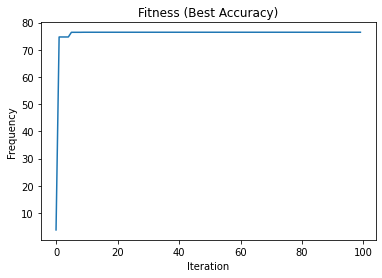

In [46]:
plt.plot(itr, fitness,scaley=100)
plt.xlabel("Iteration")  
plt.ylabel("Frequency")  
plt.title("Fitness (Best Accuracy)")  
plt.show()